dcd_ch5_hw

# Chapter 5 Homework

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/GitHub

/content/drive/MyDrive/GitHub


In [3]:
%cd 'soil-physics-theory'

/content/drive/MyDrive/GitHub/soil-physics-theory


In [4]:
%cd 'content/chapter-5'

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5


In [5]:
from PSP_Marquardt import *

In [6]:
%cd 'PSP_travelTimeAnalysis_NEW'

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5/PSP_travelTimeAnalysis_NEW


In [7]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PSP_travelTime import *
from PSP_readDataFile import readDataFile
from PSP_TTwaterContent import *

In [8]:
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'
from tkinter import *
from google.colab.patches import cv2_imshow
from google.colab import output
from PIL import Image

In [9]:
cd ..

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5


In [10]:
c = 299792458
NODATA = -9999
MAXDELTAINDEX = 8
SX = 0
DX = 1

class CLine:
    a = NODATA
    b = NODATA

class CPoint:
    x = NODATA
    y = NODATA

line1 = CLine()
line2 = CLine()
lastFlatLine = CLine()

p0 = CPoint()
p1 = CPoint()
p2 = CPoint()
p3 = CPoint()

timeVector = []
reflecCoeff = []
dy =[]
dy2 =[]

deltaSpace = 0
deltaTime = 0

## Problem 1
**Use the program PSP_travelTimeAnalysis to compute the water content
of the soil sample dataTDRSoil.dat. Change the values of bulk density, temperature
and solid-phase dielectric permittivity to investigate the effects on the
computed water content by using the dielectric mixing model.**

In [11]:
rawdata = readDataFile('dataTDRSoil.dat',0,'\t',0)

wv_avg = rawdata[0][0] #wave average
Vp = rawdata[0][1] #wave velocity
nrPoints = int(rawdata[0][2][0]) #numberof output points
cbl = rawdata[0][3] #cable length
windowWidth = rawdata[0][4] #window length
probeHandle = rawdata[0][5] #probe length
proff = rawdata[0][6] #probe offset
mult = rawdata[0][7] #multiplier
y = rawdata[0][8:]

FileNotFoundError: [Errno 2] No such file or directory: 'dataTDRSoil.dat'

In [12]:
bulkDensity = 1350
first = 0
last = len(y)
index1 = indexOfMaxVector(y, first, last)
index2 = indexOfMinVector(y, first, last)
av = avg(y, index1, index2)
noV = normalizeVector(y)
bulkPermittivity =getBulkPermittivity(cbl+probeHandle, y, Vp)
theta = getWaterContentMalicki(bulkPermittivity[2], bulkDensity)
print(theta)

NameError: name 'y' is not defined

## Problem 2
**If the temperature of the soil liquid phase increases, does the bulk dielectric permittivity
increase or decrease? What effect would this change have on soil wate
content computation?**

In [ ]:
temps = range(0, 91, 30)

for i in temps:
  print("temperature = ",i)
  print("permiativity= ", getLiquidPermittivity(i))


temperature =  0
permiativity=  87.53086650000002
temperature =  30
permiativity=  76.7418267
temperature =  60
permiativity=  65.9527869
temperature =  90
permiativity=  55.16374710000001


As temperature increases the dielectric permittivity decreases.This is because, as the particle interactions increase the ability to resist electrical discharge increases.

## Problem 3
**Compute the matric water potential for water in a saturated pore 10 μm in diameter,
at 20 ◦C. The surface tension and liquid density at this temperature are
72.75 × 10–3 Nm–1 and 1027.8 kgm–3, respectively.**

In [ ]:
diam = 10
temp = 20
tension = 72.75 * 10**-3
rho_l = 1027.8
angle = 0
rad_meter = diam /2000000

psi_m = (2*tension*cos(angle))/(rho_l*rad_meter)
print("the matric potential, at a contact angle of 0 degrees, is", round(psi_m,2),'kPa')

the matric potential, at a contact angle of 0 degrees, is 28.31 kPa


## Problem 4
**By using the integration presented in the program
PSP_columnWaterContent.py, compute the total amount of soil water
in a clay soil for a profile that is 1m deep. Use the parameters presented in
Table 5.4**

In [17]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as image
import numpy as np
import PSP_soil as soil
from PSP_integration import qsimp

In [18]:
choice = 0
print (soil.CAMPBELL,' Campbell')
print (soil.VAN_GENUCHTEN,' van Genuchten')
while (choice < soil.CAMPBELL) or (choice > soil.VAN_GENUCHTEN):
    choice = float(input("Choose water retention curve: "))
    if (choice < soil.CAMPBELL) or (choice > soil.VAN_GENUCHTEN):
        print('wrong choice.')
soil.waterRetentionCurve = choice

waterTableDepth = 1.0
nrValues = 100
step = waterTableDepth/nrValues

integral = qsimp(soil.waterContent, -waterTableDepth*9.81, 0)
totalWaterContent = integral / 9.81
print ("\nTotal water content [m2/m2]:", totalWaterContent)

x = np.zeros(nrValues+1, float)
y = np.zeros(nrValues+1, float)
for i in range(nrValues+1):
    y[i] = step*i
    psi = y[i] - waterTableDepth
    psi *= 9.81
    x[i] = soil.waterContent(psi)

1  Campbell
2  van Genuchten
Choose water retention curve: 10
wrong choice.
Choose water retention curve: 1

Total water content [m2/m2]: 0.42729485952340485


In [19]:
print(x)

[0.36295041 0.36397078 0.36500441 0.36605163 0.36711275 0.3681881
 0.36927804 0.37038291 0.37150309 0.37263895 0.37379089 0.37495933
 0.37614469 0.3773474  0.37856793 0.37980675 0.38106436 0.38234127
 0.38363802 0.38495516 0.38629326 0.38765294 0.38903482 0.39043954
 0.39186781 0.39332032 0.39479782 0.39630109 0.39783094 0.39938821
 0.4009738  0.40258864 0.4042337  0.40591    0.40761862 0.40936069
 0.41113738 0.41294995 0.41479971 0.41668803 0.41861638 0.42058629
 0.42259939 0.42465738 0.42676209 0.42891544 0.43111948 0.43337635
 0.43568837 0.43805799 0.4404878  0.4429806  0.44553934 0.4481672
 0.45086759 0.45364414 0.45650078 0.4594417  0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46      

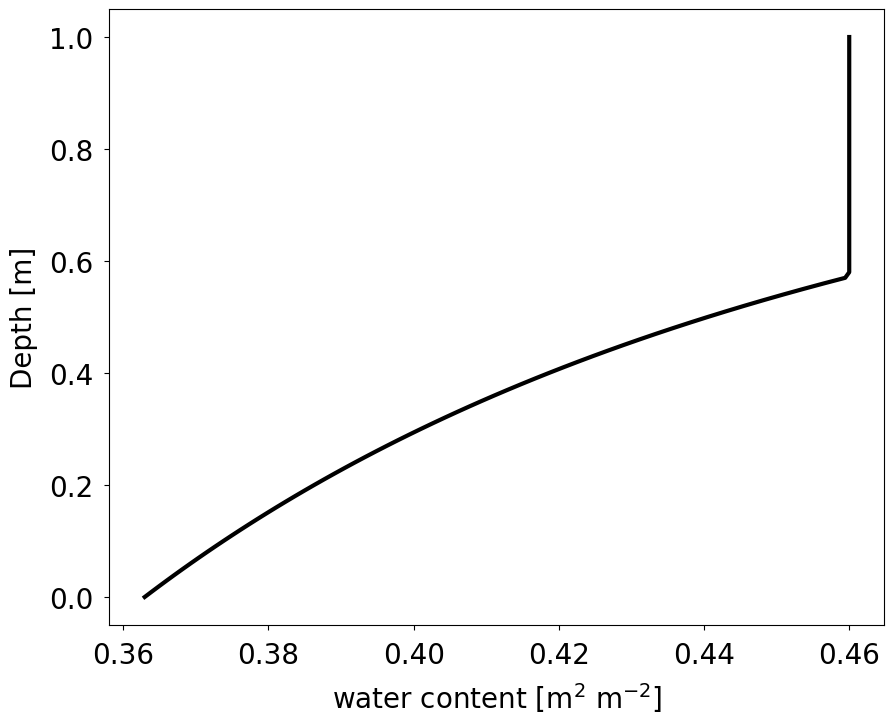

In [20]:
fig = plt.figure(figsize=(10,8))
plt.plot(x, y, 'k', linewidth='3')
#plt.legend('[Total Amount of Soil Water in Clay]', loc="upper center", frameon = False)
plt.xlabel('water content [m$^2$ m$^{-2}$]',fontsize=20,labelpad=8)
plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
plt.show()

## Problem 6
**Compute the water content at field capacity (assume ψFC = –33 J kg–1), and
permanent wilting point (assume ψPWP = –1500 J kg–1) using van Genuchten’s
equation for a soil having the following parameters: α = 0.15, n = 1.35, θr = 0.01
and θs = 0.46. The units of water potential are J kg–1. Plant available water is assumed
to be the difference between these values. Compute the plant available water
of the soil.**

1  Campbell
2  van Genuchten
Choose water retention curve: 1

Total water content [m2/m2]: 0.42729485952340485


[0.36295041 0.36397078 0.36500441 0.36605163 0.36711275 0.3681881
 0.36927804 0.37038291 0.37150309 0.37263895 0.37379089 0.37495933
 0.37614469 0.3773474  0.37856793 0.37980675 0.38106436 0.38234127
 0.38363802 0.38495516 0.38629326 0.38765294 0.38903482 0.39043954
 0.39186781 0.39332032 0.39479782 0.39630109 0.39783094 0.39938821
 0.4009738  0.40258864 0.4042337  0.40591    0.40761862 0.40936069
 0.41113738 0.41294995 0.41479971 0.41668803 0.41861638 0.42058629
 0.42259939 0.42465738 0.42676209 0.42891544 0.43111948 0.43337635
 0.43568837 0.43805799 0.4404878  0.4429806  0.44553934 0.4481672
 0.45086759 0.45364414 0.45650078 0.4594417  0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46       0.46       0.46       0.46
 0.46       0.46       0.46      

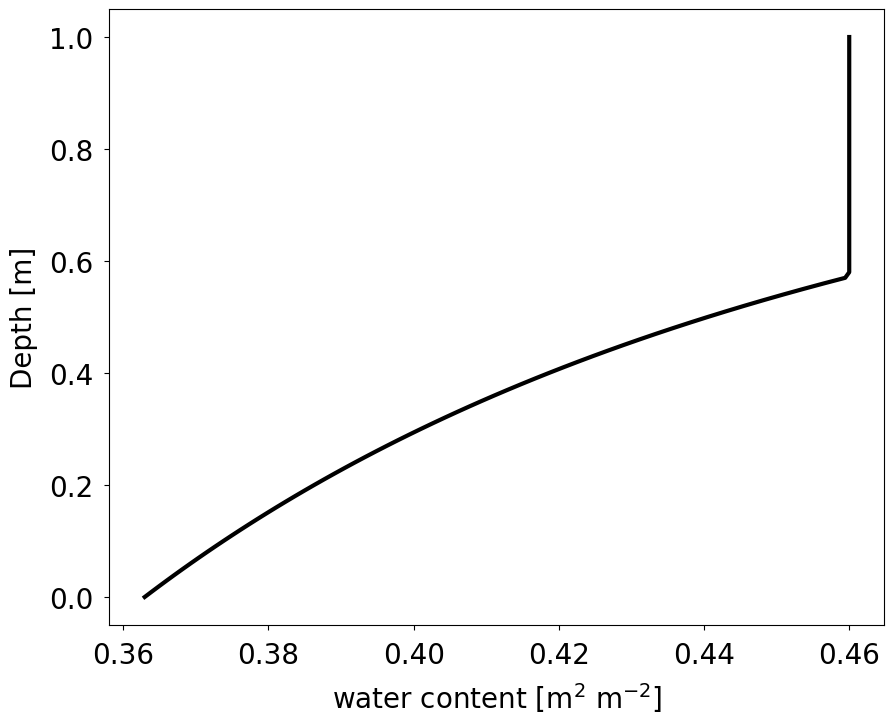

## Problem 5
**By using the two files sand.txt and silt_loam.text, fit Campbell’s equation,
van Genuchten’s equation with no parameter restriction and van Genucthen’s
equation with the restriction m = 1 – 1/n. Print the parameters and discuss the differences
obtained by using the different models. Also discuss the differences in the
estimated parameters for the two soils.**

In [ ]:
pot = [-33,-1500]


## Problem 7
**Derive the capacity for Campbell’s and van Genuchten’s equations by computing
the derivatives of the two functions with respect t psi**
.